In [8]:
import os
from os import listdir
from os.path import isfile, join
import json
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import datetime

participantCode = "AP-001"
mypath = "D:\\Projects\\Thesis\\Main-study\\ThesisDataProcessing\\Participants\\" + participantCode

print(listdir(mypath))

['AP-001 - Easy - PWA accel - 1637577236782_1.json', 'AP-001 - Easy - PWA accel - 1637577315956_2.json', 'AP-001 - Easy - PWA accel - 1637577394612_3.json', 'AP-001 - Hard - PWA accel - 1637577738301_1.json', 'AP-001 - Hard - PWA accel - 1637577816969_2.json', 'AP-001 - Hard - PWA accel - 1637577895471_3.json', 'AP-001 - Medium - PWA accel - 1637577489952_1.json', 'AP-001 - Medium - PWA accel - 1637577568585_2.json', 'AP-001 - Medium - PWA accel - 1637577647647_3.json']


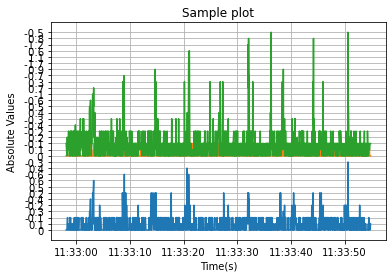

In [13]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# print(onlyfiles)

easySensorValues = []
easyTimeValues = []
mediumSensorValues = []
hardSensorValues = []

for file in onlyfiles:
    f = open(os.path.join(mypath, file), "r")
    data = json.load(f)
    sensorValues = []
    timeValues = []
    # print("SensorValues for", f)
    if "easy" in data:
        for i in data["easy"]:
            sensorValues.append(i["sensorValue"])
            timeValues.append(
                datetime.datetime.fromtimestamp(i["time"] / 1000.0))
    easyTimeValues.append(timeValues)
    easySensorValues.append(sensorValues)
    if "medium" in data:
        for i in data["medium"]:
            sensorValues.append(i["sensorValue"])
    mediumSensorValues.append(sensorValues)
    if "hard" in data:
        for i in data["hard"]:
            sensorValues.append(i["sensorValue"])
    hardSensorValues.append(sensorValues)

# print("----------------")
# print(len(list(chain.from_iterable(easySensorValues))))
# print(len(easySensorValues))
# print("----------------")
# print(len(mediumSensorValues))
# print("----------------")
# print(len(hardSensorValues))

t = np.arange(0.0, 2.0, 0.01)


def splitAxis(arrayToSplit):
    x = []
    y = []
    z = []

    for values in arrayToSplit:
        holder = values.split(",")
        x.append(holder[0])
        y.append(holder[1])
        z.append(holder[2])

    return [x, y, z]


x, y, z = splitAxis(easySensorValues[0])

fig, ax = plt.subplots()
ax.plot(easyTimeValues[0], x, label="x values")
ax.plot(easyTimeValues[0], y, label="y values")
ax.plot(easyTimeValues[0], z, label="z values")
ax.set(xlabel="Time(s)", ylabel="Absolute Values", title="Sample plot")
ax.grid()

# xline = [0]
# yline = [0]
# zline = [0]

# for f in range(len(x)):
#     xline.append(xline[f - 1] + float(x[f]))
# for f in range(len(y)):
#     yline.append(yline[f - 1] + float(y[f]))
# for f in range(len(x)):
#     zline.append(zline[f - 1] + float(z[f]))

# timeValuesHolder = easyTimeValues[0]
# timeValuesHolder.append(datetime.datetime.now())

# ax.plot(timeValuesHolder, xline, label="x values")
# ax.plot(timeValuesHolder, yline, label="y values")
# ax.plot(timeValuesHolder, zline, label="z values")

# ax.set(xlabel="Time(s)", ylabel="Absolute Values", title="Sample plot")
# ax.grid()

# fig.savefig("test.png")